### Introduction

Retail prices can vary significantly among states in the U.S. due to a variety of factors. Here are some key aspects that contribute to these differences:

1. Cost of Living: States with a higher cost of living, like California and New York, often have higher retail prices. This is due to factors like higher wages, real estate costs, and general expenses in these areas.

2. Sales Tax: Different states have varying sales tax rates. Some states, like Oregon and Delaware, have no sales tax, while others have high rates. This directly affects the final retail price of goods.

3. Supply Chain and Transportation Costs: The cost to transport goods to different states can influence retail prices. Remote or less accessible areas might have higher prices due to higher transportation costs.

4. Demand: In areas with higher demand for certain goods, prices may be higher due to the principles of supply and demand.

5. State Regulations and Policies: State-specific regulations, such as environmental or safety standards, can add to the cost of goods, influencing their retail price.

6. Local Economic Conditions: States with stronger local economies might see higher prices due to increased purchasing power of residents.

7. Real Estate and Rental Costs: The cost of renting or owning commercial spaces in different states can vary greatly, affecting the overhead costs for retailers and consequently the prices of goods.

These factors combine in complex ways, making it difficult to generalize about retail prices across the entire country. 

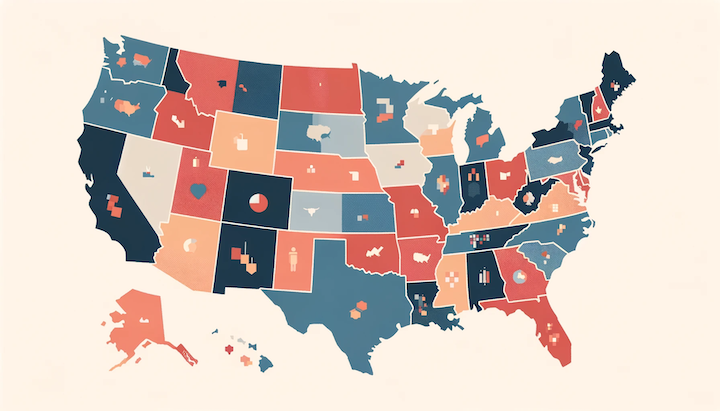

### Data Outlines

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/produce-prices-dataset/ProductPriceIndex.csv


In [2]:
data=pd.read_csv('/kaggle/input/produce-prices-dataset/ProductPriceIndex.csv')
data.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,$1.16,$2.23,$1.70,$1.99,$2.54,82.33%
1,Romaine Lettuce,2019-05-19,$0.35,$1.72,$2.00,$1.69,$1.99,428.57%
2,Red Leaf Lettuce,2019-05-19,$0.32,$1.84,$1.84,$1.69,$1.89,467.19%
3,Potatoes,2019-05-19,$1.50,$5.32,$5.14,$3.99,$6.22,244.50%
4,Oranges,2019-05-19,$0.41,$1.42,$1.45,$1.34,$2.05,281.71%


The dataset contains information about various agricultural products, with the following columns:

* Product Name: The name of the agricultural product.
* Date: The date when the pricing information was recorded.
* Farm Price: The price at which the product is sold at the farm. These values are represented in dollar amounts.
* Retail Prices in Major Cities:
* Atlanta Retail: Retail price in Atlanta.
* Chicago Retail: Retail price in Chicago.
* Los Angeles Retail: Retail price in Los Angeles.
* New York Retail: Retail price in New York.
* Each of these values is given in dollar amounts.
* Average Spread: The percentage indicating the average markup between the farm and retail prices.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   productname       15766 non-null  object
 1   date              15766 non-null  object
 2   farmprice         15766 non-null  object
 3   atlantaretail     15766 non-null  object
 4   chicagoretail     15766 non-null  object
 5   losangelesretail  15766 non-null  object
 6   newyorkretail     15766 non-null  object
 7   averagespread     15766 non-null  object
dtypes: object(8)
memory usage: 985.5+ KB


### Analysis Summary

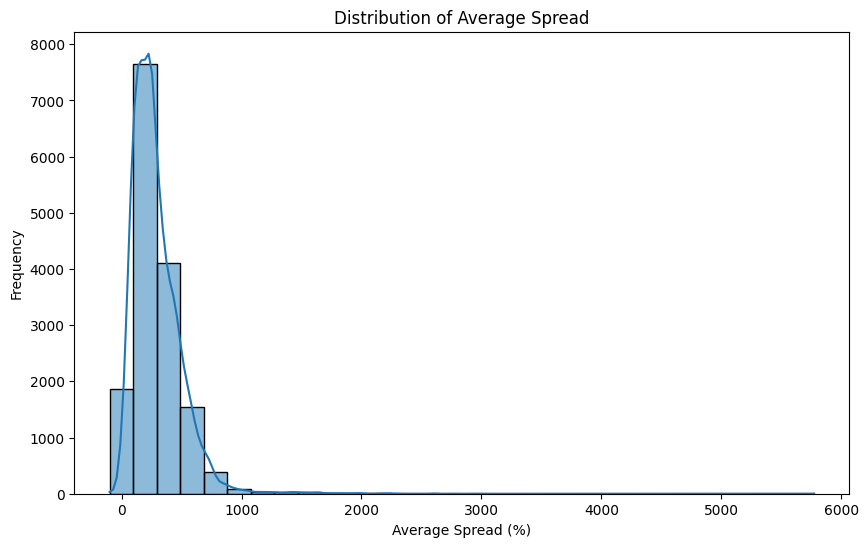

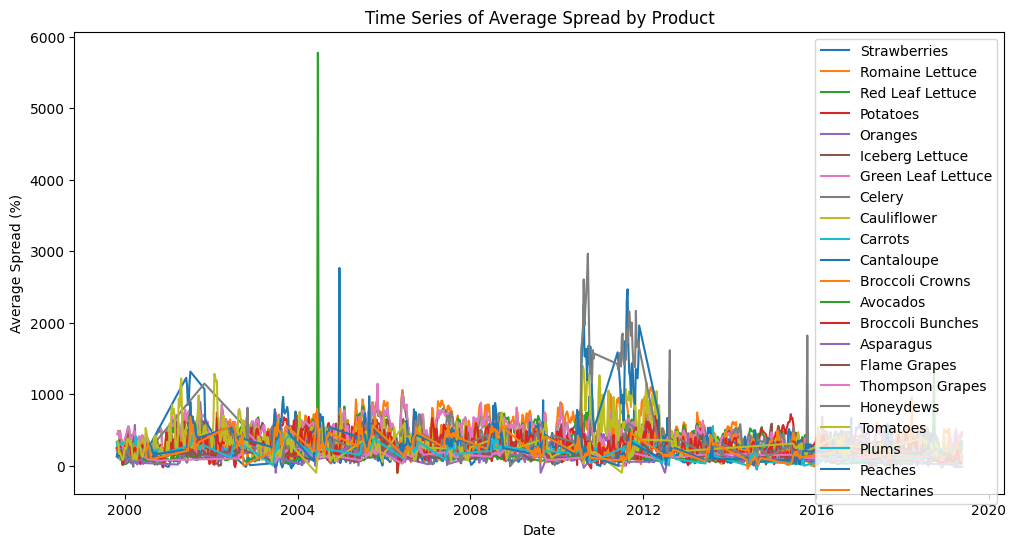

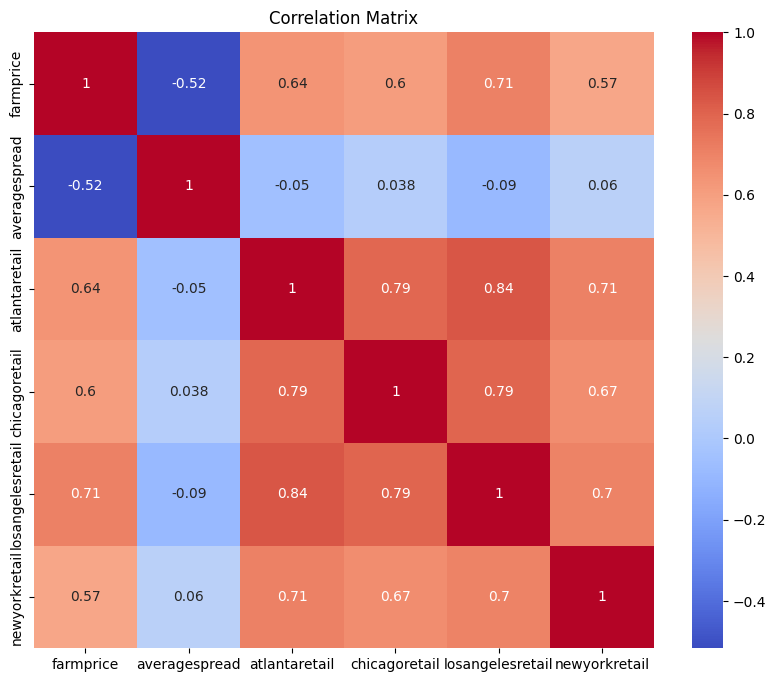

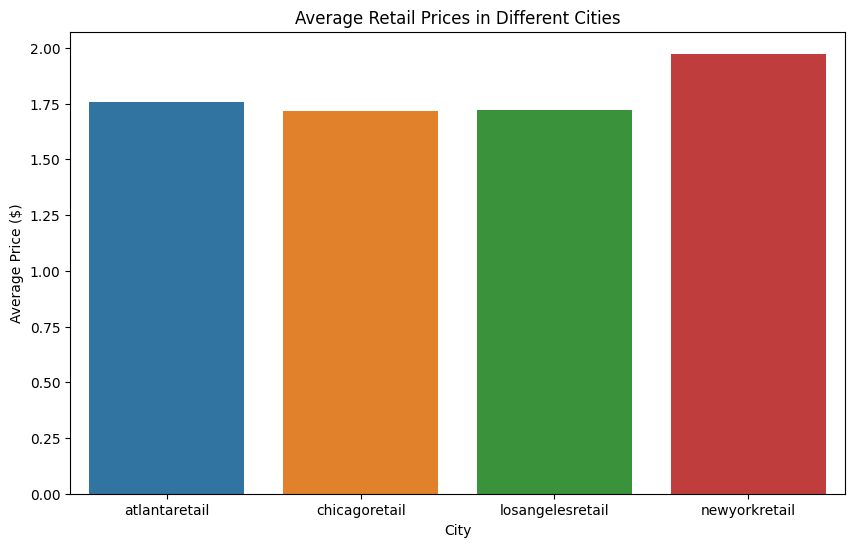

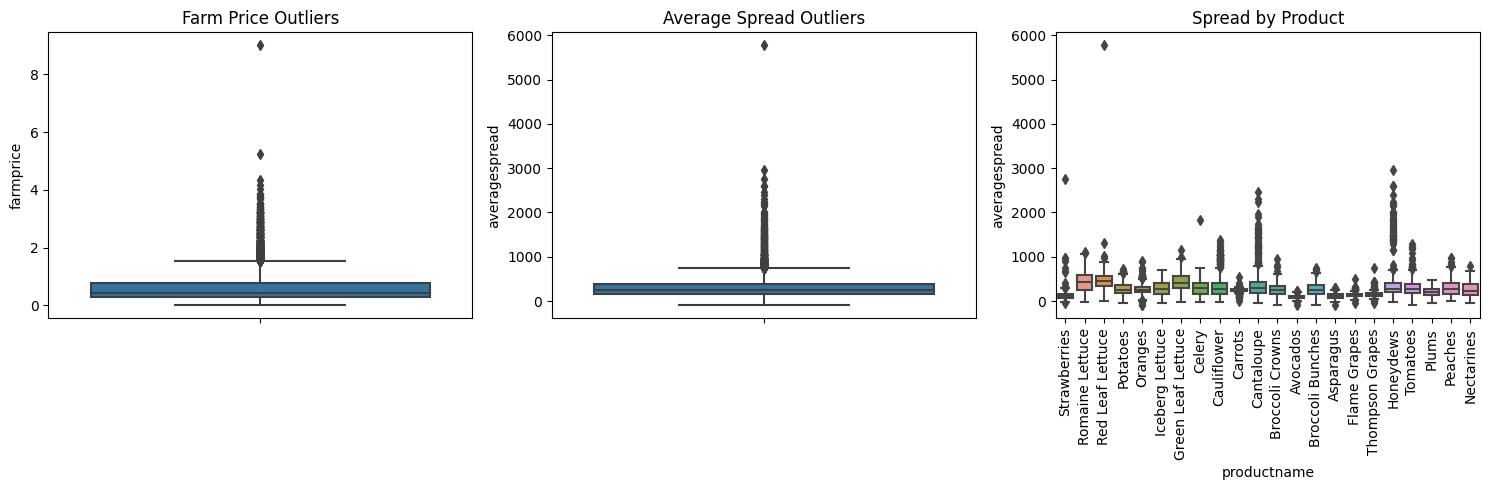

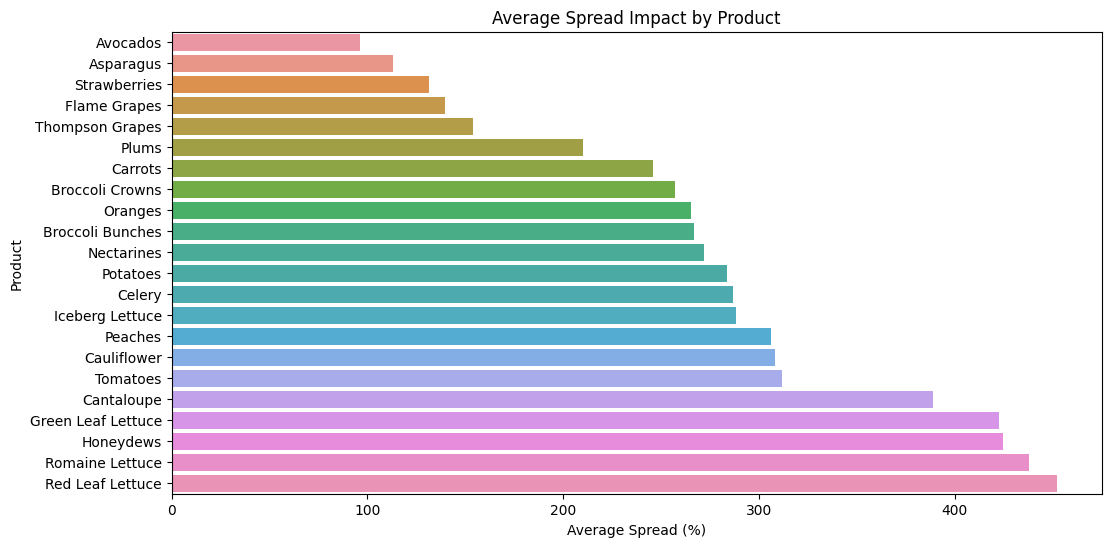

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data preprocessing
# Convert the price and spread columns to numeric values
data['farmprice'] = pd.to_numeric(data['farmprice'].replace('[\$,]', '', regex=True), errors='coerce')
data['atlantaretail'] = pd.to_numeric(data['atlantaretail'].replace('[\$,]', '', regex=True), errors='coerce')
data['chicagoretail'] = pd.to_numeric(data['chicagoretail'].replace('[\$,]', '', regex=True), errors='coerce')
data['losangelesretail'] = pd.to_numeric(data['losangelesretail'].replace('[\$,]', '', regex=True), errors='coerce')
data['newyorkretail'] = pd.to_numeric(data['newyorkretail'].replace('[\$,]', '', regex=True), errors='coerce')
data['averagespread'] = pd.to_numeric(data['averagespread'].replace('[\%,]', '', regex=True), errors='coerce')

# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Spread Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['averagespread'], bins=30, kde=True)
plt.title('Distribution of Average Spread')
plt.xlabel('Average Spread (%)')
plt.ylabel('Frequency')
plt.show()

# Time Series Analysis
plt.figure(figsize=(12, 6))
for product in data['productname'].unique():
    temp = data[data['productname'] == product]
    plt.plot(temp['date'], temp['averagespread'], label=product)

plt.title('Time Series of Average Spread by Product')
plt.xlabel('Date')
plt.ylabel('Average Spread (%)')
plt.legend()
plt.show()

# Correlation Analysis
correlation_matrix = data[['farmprice', 'averagespread', 'atlantaretail', 'chicagoretail', 'losangelesretail', 'newyorkretail']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regional Price Variations
cities = ['atlantaretail', 'chicagoretail', 'losangelesretail', 'newyorkretail']
avg_city_prices = data[cities].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_city_prices.index, y=avg_city_prices.values)
plt.title('Average Retail Prices in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Price ($)')
plt.show()

# Outliers and Anomalies
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=data, y='farmprice', ax=axes[0])
axes[0].set_title('Farm Price Outliers')
sns.boxplot(data=data, y='averagespread', ax=axes[1])
axes[1].set_title('Average Spread Outliers')
sns.boxplot(data=data, x='productname', y='averagespread', ax=axes[2])
axes[2].set_title('Spread by Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Impact of Specific Products
product_spread_impact = data.groupby('productname')['averagespread'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=product_spread_impact.values, y=product_spread_impact.index)
plt.title('Average Spread Impact by Product')
plt.xlabel('Average Spread (%)')
plt.ylabel('Product')
plt.show()

The analyses and visualizations for the agricultural product dataset provide valuable insights:

1. Spread Distribution:

The histogram shows the distribution of average spreads across all products. It seems that the spread varies significantly, with some products having much higher spreads than others.

2. Time Series Analysis:

This plot illustrates the fluctuations in average spread over time for different products. These trends suggest that there might be seasonal influences or other external factors affecting the pricing.

3. Correlation Analysis:

The heatmap of the correlation matrix reveals relationships between different variables. Notably, there is a correlation between farm price and average spread, suggesting that as farm prices increase, the spread tends to increase as well.

4. Regional Price Variations:

The bar chart shows average retail prices in different cities. There are noticeable variations, indicating that some cities consistently have higher or lower prices.

5. Outliers and Anomalies:

The boxplots for farm prices and average spreads help identify outliers in the dataset. These outliers might indicate exceptional market conditions or potential errors in data collection.

6. Impact of Specific Products:

The final bar chart shows the impact of specific products on the overall average spread distribution. It highlights which products contribute more significantly to price fluctuations.

These visualizations and analyses provide a comprehensive overview of the dataset, revealing important trends and relationships that can inform further study and decision-making in the agricultural market sector.

For example, the reason behind the unusually high retail price of "Red Leaf Lettuce" in New York, as indicated by the value of 41.49, several factors can be considered:

* Data Entry Error: It's possible that this value is a result of a data entry error. Prices that are significantly higher or lower than the norm often indicate mistakes in data entry.

* Market Dynamics: Local market dynamics in New York could contribute to higher prices. This includes supply chain issues, demand fluctuations, and local economic factors.

* Seasonal Variations: If the data corresponds to a specific time of the year, it might reflect seasonal scarcity, leading to higher prices.

* Quality or Organic Produce: The lettuce might be of a higher quality, organic, or a specialty variety that commands a higher price.

* Transportation and Logistics Costs: Costs associated with transportation and logistics, particularly if the lettuce is imported or transported from a distant location, can significantly affect retail pricing.

* Retailer Pricing Strategies: Different retailers have varying pricing strategies. Some might target premium markets, leading to higher prices.

* External Factors: External factors like weather conditions affecting crops, economic policies, and changes in consumer preferences could also play a role.

### Specific Products and Major Cities

In [5]:
# Analyzing the specific features of each city
city_features = data.groupby('productname')[cities].mean()

# Display the results
city_features.head()

,atlantaretail,chicagoretail,losangelesretail,newyorkretail
productname,,,,
Asparagus,2.870613,2.600958,2.983870,2.745479
Avocados,1.183122,1.382152,1.445387,1.601997
Broccoli Bunches,1.795015,1.422816,1.337965,1.736927
Broccoli Crowns,1.756421,1.572419,1.677522,1.756289
Cantaloupe,1.605655,1.627817,1.582302,1.752520


This table provides an overview of how retail prices vary for specific products across major cities like Atlanta, Chicago, Los Angeles, and New York. It helps in understanding regional price variations and market dynamics. 

### The average retail prices

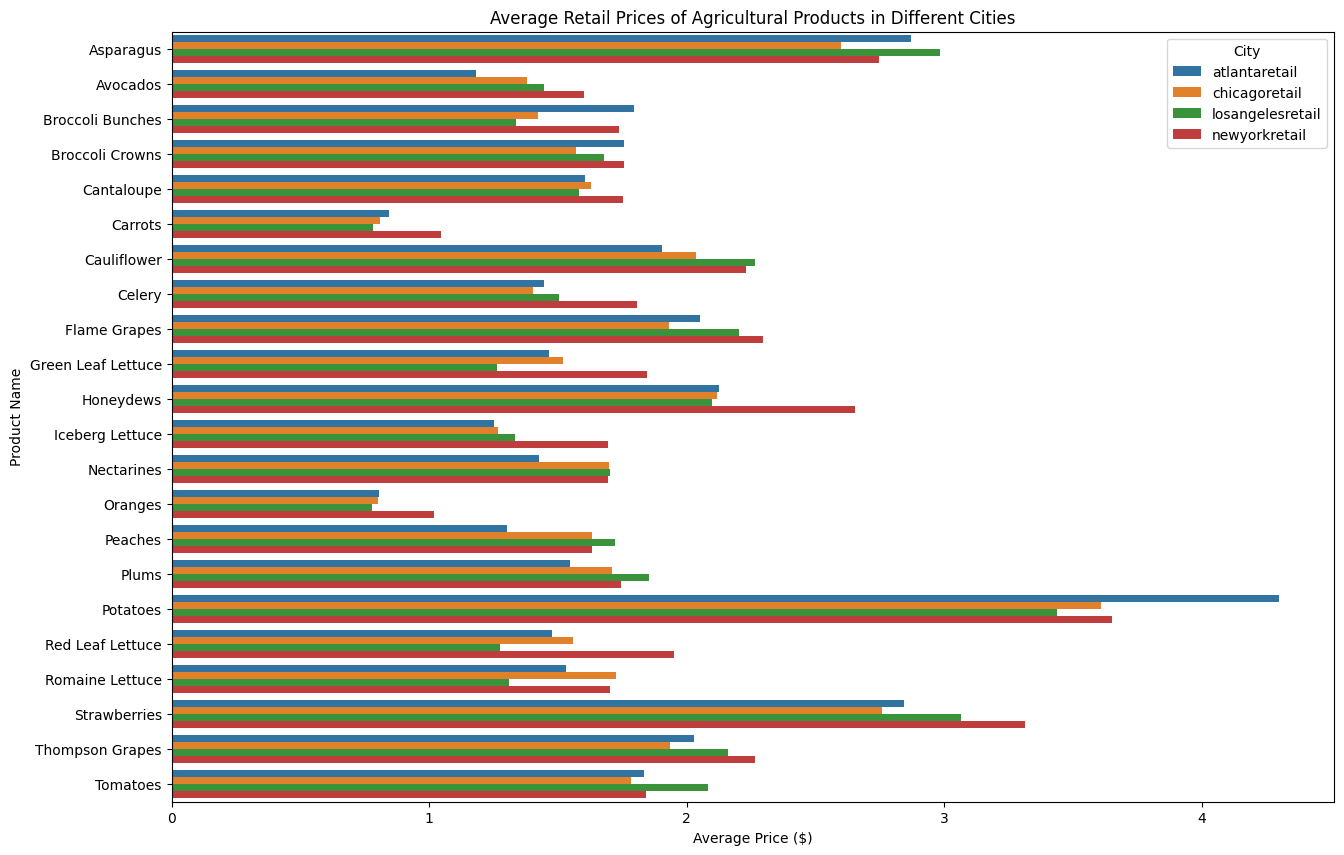

In [6]:
# Generating a chart for the average retail prices of different agricultural products in each city

# Preparing data for the chart
# Taking mean of retail prices for each city by product
city_average_prices = data.groupby('productname')[cities].mean().reset_index()

# Melting the data for easier plotting
melted_city_prices = city_average_prices.melt(id_vars=['productname'], var_name='City', value_name='Average Price')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Average Price', y='productname', hue='City', data=melted_city_prices)
plt.title('Average Retail Prices of Agricultural Products in Different Cities')
plt.xlabel('Average Price ($)')
plt.ylabel('Product Name')
plt.legend(title='City')
plt.show()

Here is the chart representing the average retail prices of different agricultural products in Atlanta, Chicago, Los Angeles, and New York, measured in U.S. dollars.

In this bar chart:

* Each product is listed on the y-axis.
* The average prices are shown on the x-axis.
* The different colors represent the respective cities.

This visualization provides a clear comparison of how retail prices for each agricultural product vary across these major cities. It's a useful tool for analyzing regional price differences and market trends. 

### The price changes for each city

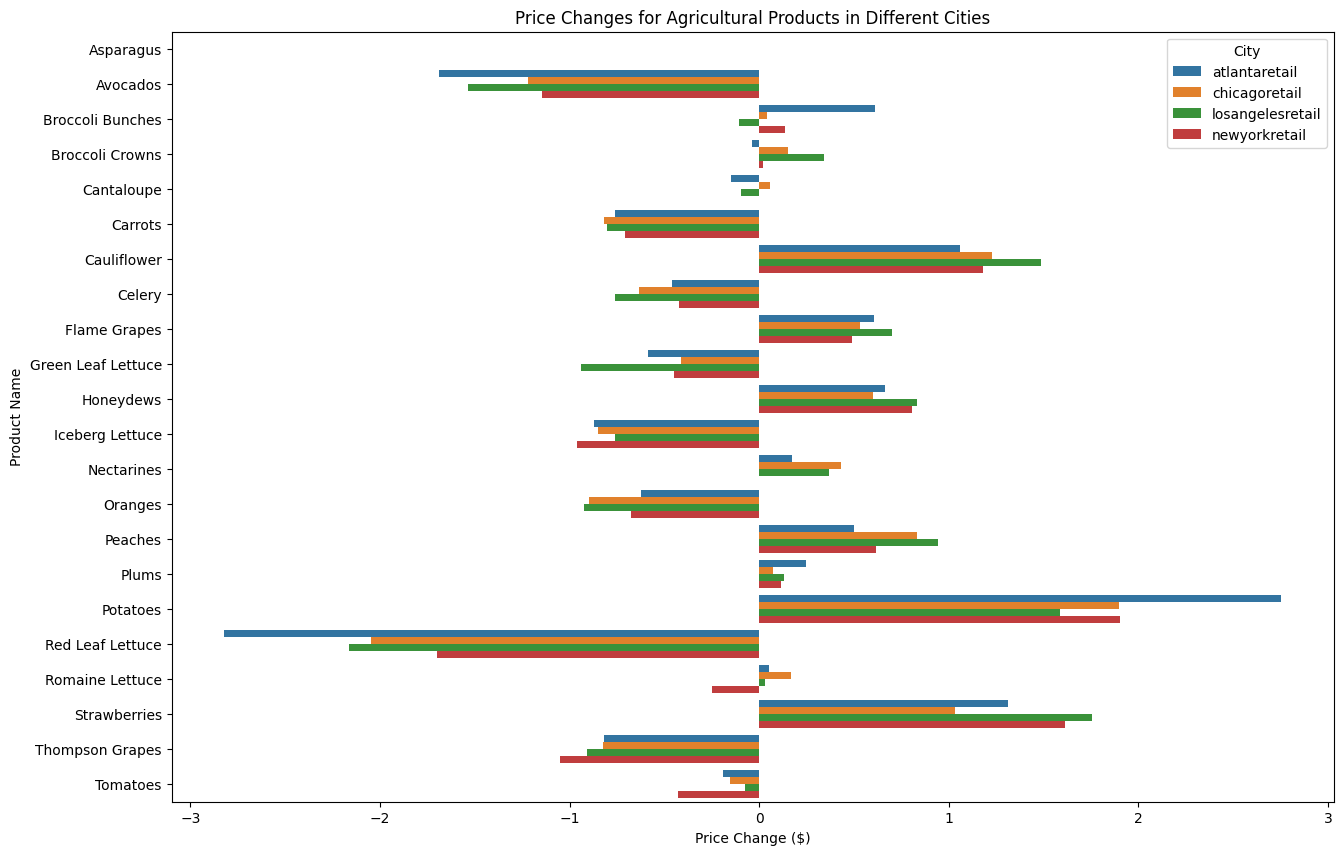

In [7]:
# Calculating the price changes for each city
city_price_changes = city_features.diff().fillna(0)

# Melting the data for easier plotting
melted_price_changes = city_price_changes.reset_index().melt(id_vars='productname', var_name='City', value_name='Price Change')

# Plotting the price changes for each city and product
plt.figure(figsize=(15, 10))
sns.barplot(x='Price Change', y='productname', hue='City', data=melted_price_changes)
plt.title('Price Changes for Agricultural Products in Different Cities')
plt.xlabel('Price Change ($)')
plt.ylabel('Product Name')
plt.legend(title='City')
plt.show()

The chart displayed represents the price changes for different agricultural products in Atlanta, Chicago, Los Angeles, and New York.

In this bar chart:

* Each product is listed on the y-axis.
* The price changes are shown on the x-axis.
* The colors differentiate the cities.

This visualization helps in understanding how the prices of various agricultural products have changed over time in these major cities. It provides insights into market dynamics and can be useful for comparing trends across different regions. 

### Price up and down by city

In [8]:
# Calculating the price changes (up and down) for each city
price_changes = city_features.diff().fillna(0)

# Identifying price increases (up) and decreases (down)
price_up = price_changes[price_changes > 0]
price_down = price_changes[price_changes < 0]

# Display the results for price increases and decreases
price_up_summary = price_up.describe().loc[['mean', 'max'], :]
price_down_summary = price_down.describe().loc[['mean', 'max'], :]

price_up_summary, price_down_summary

(      atlantaretail  chicagoretail  losangelesretail  newyorkretail
 mean       0.797478       0.586737          0.817457        0.68765
 max        2.752987       1.899040          1.756476        1.90467,
       atlantaretail  chicagoretail  losangelesretail  newyorkretail
 mean      -0.819028      -0.873266         -0.825008      -0.707349
 max       -0.038595      -0.153153         -0.076074      -0.003770)

The analysis of price changes for different agricultural products in Atlanta, Chicago, Los Angeles, and New York shows the following trends:

1. Price Increases (Up)
* Atlanta Retail:
Average Increase: 0.80
Maximum Increase: 2.75
* Chicago Retail:
Average Increase: 0.59
Maximum Increase: 1.90
* Los Angeles Retail:
Average Increase: 0.82
Maximum Increase: 1.76
* New York Retail:
Average Increase: 0.69
Maximum Increase: 1.90

2. Price Decreases (Down)
* Atlanta Retail:
Average Decrease: -0.82
Maximum Decrease: -0.04
* Chicago Retail:
Average Decrease: -0.87
Maximum Decrease: -0.15
* Los Angeles Retail:
Average Decrease: -0.83
Maximum Decrease: -0.08
* New York Retail:
Average Decrease: -0.71
Maximum Decrease: -0.004

These figures indicate the average and maximum price changes for each city. Positive values indicate price increases, while negative values indicate decreases. This analysis helps in understanding the volatility and trends in retail pricing across different regions.

Thank you!